In [1]:
import numpy as np
from scipy.integrate import solve_ivp

0
The solver successfully reached the end of the integration interval.
True


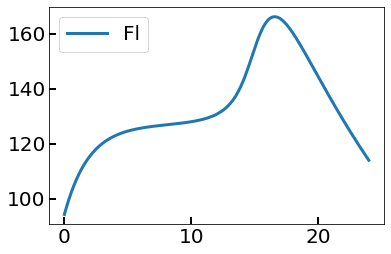

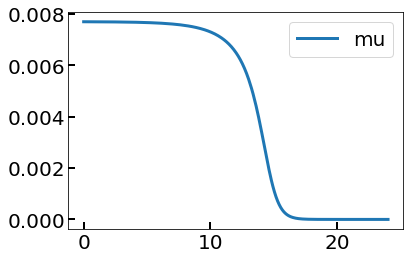

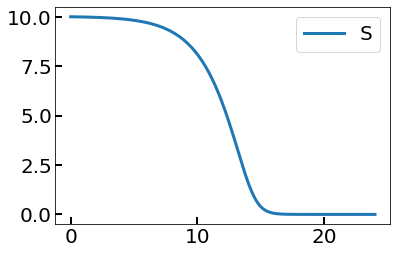

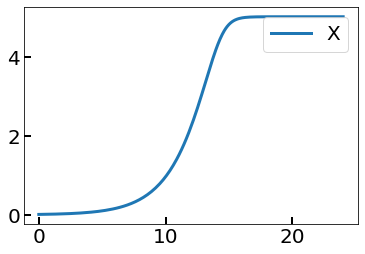

In [2]:
def growth_fluorophore(t,x,p):

    # Parameters
    mu_max, Ks, Kf, Y, k_p, kd_p = p

    # Variables
    S, X, Fl = x
    
    n = 0.5

    mu = mu_max * S / (Ks + S)

    dSdt = - (mu / Y) * X
    dXdt = mu * X

    dFdt = k_p * S ** n / (Kf ** n + S ** n) - (kd_p + mu) * Fl

    return [dSdt, dXdt, dFdt]

mu_max = 2/200
Ks = 3
Kf = 1
Y = 0.5
k_p = 1.4514
kd_p = 0.01

kd_p=0.001

Fsteady = k_p / (kd_p + mu_max)

x_init = [10, 0.01,Fsteady/1.4]

tspan = [0, 24*60]

p = mu_max, Ks, Kf, Y, k_p, kd_p

sol = solve_ivp(growth_fluorophore, t_span=tspan, y0=x_init, args=(p,),
                    rtol=1e-6, atol=1e-9, 
                    # t_eval=np.linspace(tspan[0], tspan[1], 1000000), 
                    method='BDF',
                    first_step = 0.0001,
                    # max_step=max_step,
                    )

print(sol.status)
print(sol.message)
print(sol.success)

import matplotlib.pyplot as plt

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[2,:], label='Fl', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)


my_mu = mu = mu_max * sol.y[0,:] / (Ks + sol.y[0,:])

plt.figure(facecolor='white')
plt.plot(sol.t/60, my_mu, label='mu', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[0,:], label='S', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[1,:], label='X', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

0
The solver successfully reached the end of the integration interval.
True


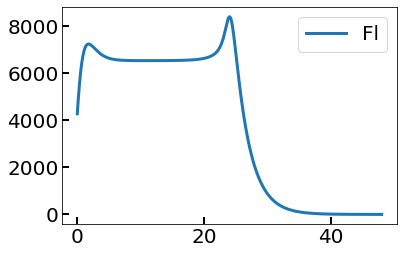

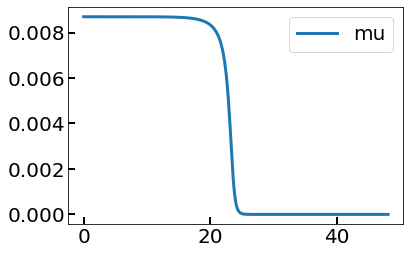

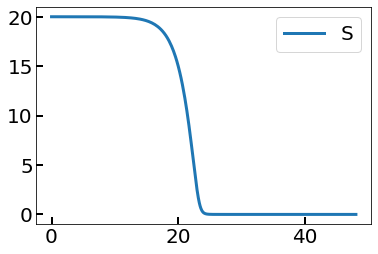

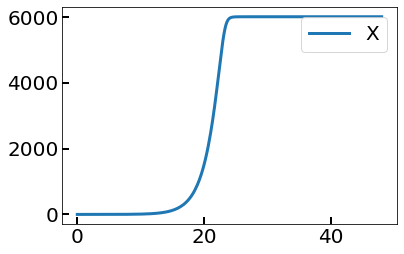

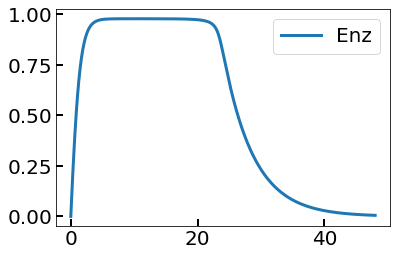

In [3]:
def growth_fluorophore_enz(t,x,p):

    # Parameters
    mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d = p

    # Variables
    S, X, Fl, Enz = x
    
    n = 1
    
    if S > 0:
        mu = mu_max * S * Enz / (Ks + S)
    else:
        mu = 0

    # Enz = Enz / ((mu_max + ke_d) / ke_p)
    dEnzdt = ke_p * S / (Ks + S) - (ke_d + mu) * Enz
    # dEnzdt = ke_p * S / (Ks + S) - (ke_d ) * Enz
    # dEnzdt = dEnzdt * ((mu_max + ke_d) / ke_p)


    
    dSdt = - (mu / Y) * X
    dXdt = mu * X
    
    if S > 0:
        dFdt = k_p * S ** n / (Kf ** n + S ** n) - (kd_p + mu) * Fl
    else:
        dFdt = - (kd_p + mu) * Fl

    return [dSdt, dXdt, dFdt, dEnzdt]

mu_max = 2/200
Ks = 3
Kf = 0.1
Y = 0.5 * 600
k_p = 1.4514 * 70
kd_p = 0.007 / 1

ke_p = 1.4514 / 1
ke_d = 0.007 / 2

ke_p = ke_p / (ke_p / (ke_d + mu_max))
# ke_p = ke_p / (ke_p / (ke_d))
# kd_p=0.003

Fsteady = k_p / (kd_p + mu_max)

x_init = [20, 0.1,Fsteady/1.4, 0]

tspan = [0, 48*60]

p = mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d

sol = solve_ivp(growth_fluorophore_enz, t_span=tspan, y0=x_init, args=(p,),
                    rtol=1e-6, atol=1e-9, 
                    # t_eval=np.linspace(tspan[0], tspan[1], 1000000), 
                    method='BDF',
                    first_step = 0.0001,
                    # max_step=max_step,
                    )

print(sol.status)
print(sol.message)
print(sol.success)

import matplotlib.pyplot as plt

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[2,:], label='Fl', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)


my_mu = mu = mu_max * sol.y[0,:] / (Ks + sol.y[0,:])

plt.figure(facecolor='white')
plt.plot(sol.t/60, my_mu, label='mu', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)
    
plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[0,:], label='S', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[1,:], label='X', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[3,:], label='Enz', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

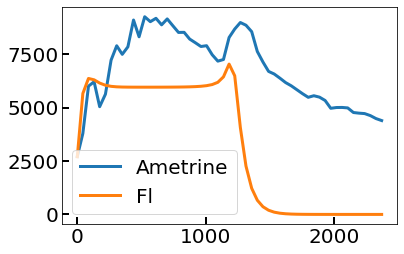

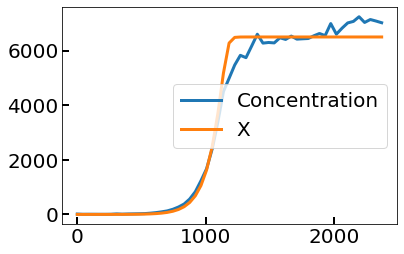

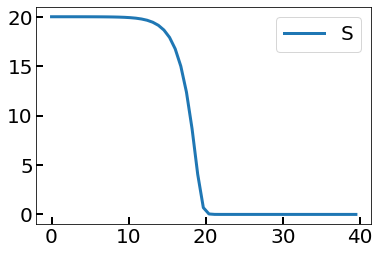

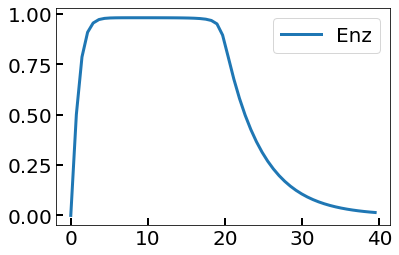

In [4]:
import pandas as pd

mu_max = 0.012
Ks = 3
Kf = 0.1
Y = 0.5 * 650
k_p = 1.4514 * 100
kd_p = 0.007 * 2

ke_p = 1.4514 / 1
ke_d = 0.007 / 2

ke_p = ke_p / (ke_p / (ke_d + mu_max))
# ke_p = ke_p / (ke_p / (ke_d))
# kd_p=0.003

Fsteady = k_p / (kd_p + mu_max)

x_init = [20, 0.1,2700, 0]

tspan = [0, 48*60]

p = mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d

df = pd.read_csv('mAmetrineDataPlay.csv')
tspan = np.array([df['Time'].to_numpy()[0], df['Time'].to_numpy()[-1]]) * 60
sol = solve_ivp(growth_fluorophore_enz, t_span=tspan, y0=x_init, args=(p,), t_eval=df['Time'] * 60, method='BDF', rtol=1e-6, atol=1e-9)

plt.figure(facecolor='white')
plt.plot(df['Time'] * 60, df['Ametrine'], label='Ametrine', linewidth=3)
plt.plot(sol.t, sol.y[2,:], label='Fl', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(df['Time'] * 60, df['Concentration'], label='Concentration', linewidth=3)
plt.plot(sol.t, sol.y[1,:], label='X', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[0,:], label='S', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure(facecolor='white')
plt.plot(sol.t/60, sol.y[3,:], label='Enz', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

In [5]:
import pandas as pd
from scipy.optimize import minimize

df = pd.read_csv('mAmetrineDataPlay.csv')

def growth_fluorophore_enz(t,x,p):

    # Parameters
    mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d, km_p = p

    # Variables
    S, X, Fl, Enz, Flm = x
    
    n = 1
    
    if S > 0:
        mu = mu_max * S * Enz / (Ks + S)
    else:
        mu = 0
    
    if S > 0:
        dFdt = k_p * S ** n / (Kf ** n + S ** n) - (kd_p + mu + km_p) * Fl
        dEnzdt = ke_p * S / (Ks + S) - (ke_d + mu) * Enz
        dSdt = - (mu / Y) * X
        dXdt = mu * X
    else:
        dFdt = - (kd_p + mu + km_p) * Fl
        dEnzdt = - (ke_d + mu) * Enz
        dSdt = - (mu / Y) * X
        dXdt = mu * X

    dFmdt = km_p * Fl - (kd_p + mu) * Flm

    return [dSdt, dXdt, dFdt, dEnzdt, dFmdt]

def fsolvemefunc(pars, plotme=False):
    global iter
    x0 = pars[:5]
    p = pars[5:]
    p[6] = p[6] / (p[6] / (p[7] + p[0]))
    tspan = np.array([df['Time'].to_numpy()[0], df['Time'].to_numpy()[-1]]) * 60
    sol = solve_ivp(growth_fluorophore_enz, t_span=tspan, y0=x0, args=(p,), t_eval=df['Time'] * 60, method='BDF', rtol=1e-6, atol=1e-9)

    pre10indices = df['Time'].to_numpy() < 6
    post10indices = df['Time'].to_numpy() >= 6


    mAm_error = np.sqrt(np.average((sol.y[4,:][pre10indices] - df['Ametrine'][pre10indices]) ** 2)) + np.sqrt(np.average((sol.y[4,:][post10indices] - df['Ametrine'][post10indices]) ** 2)) * 10
    OD_error = np.sqrt(np.average((sol.y[1,:][pre10indices] - df['Concentration'][pre10indices]) ** 2)) + np.sqrt(np.average((sol.y[1,:][post10indices] - df['Concentration'][post10indices]) ** 2)) * 10
    total_error = mAm_error * 10 + OD_error
    if iter %100 == 0:
        print("Running iteration " + str(iter) + "; current error: " + str(total_error) + "; pars: " + str(pars))
    iter += 1
    return total_error

mu_max = 2/200
Ks = 3
Kf = 0.1
Y = 0.5 * 600
k_p = 1.4514 * 70
kd_p = 0.007 / 1

ke_p = 1.4514 / 1
ke_d = 0.007 / 2
km_p = 0.007 / 1

# S, X, Fl, Enz
x_guess = [20, 0.1,2000, 0, 3000]
p_guess = [mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d, km_p]

iter = 0
fsolve_init = np.concatenate((x_guess, p_guess))


# fsolve_init = varies

# fsolve_init = res.x
# bounds=[(0.0001, None), (0, None), (0, None), (0.0001, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0.0001, None)]
bounds = [(1e-9, 40), (1e-9, 100), (1e-9, 10000), (1e-9, 0.9), (2000, 3000), (1e-9, 10), (1e-9, 10), (1e-9, 10), (1e-9, 1000), (1e-9, 500), (1e-9, 10), (1e-9, 500), (1e-9, 10), (1e-9, 100000)]
res = minimize(fsolvemefunc, fsolve_init, method='L-BFGS-B', bounds=bounds,
            options={'disp': None, 'maxls': 20, 'iprint': -1, 'gtol': 1e-09, 'eps': 1e-08, 'maxiter': 15000, 'ftol': 1e-12, 'maxcor': 10, 'maxfun': 15000})
# res = minimize(fsolvemefunc, fsolve_init, method='BFGS')

# res = minimize(fsolvemefunc, fsolve_init, method='Powell', bounds=bounds,
#             options={'disp': None, 'maxls': 20, 'iprint': -1, 'gtol': 1e-09, 'eps': 1e-08, 'maxiter': 15000, 'ftol': 1e-12, 'maxcor': 10, 'maxfun': 15000})

print(res)

# from scipy.optimize import differential_evolution
# bounds = [(1, 40), (0, 100), (2000, 5000), (0, 1), (0, 1), (0, 10), (0, 10), (0, 1000), (0, 500), (0, 10), (0, 500), (0, 10)]
# # result = differential_evolution(fsolvemefunc, bounds=bounds, updating='deferred', workers=64, maxiter=100, popsize=100, tol=1e-6, disp=True)
# result = differential_evolution(fsolvemefunc, bounds=bounds,  maxiter=100, popsize=100, tol=1e-6, disp=True)

# print(result.x, result.fun)

Running iteration 0; current error: 603694.7567309259; pars: [2.00000e+01 1.00000e-01 2.00000e+03 1.00000e-09 3.00000e+03 1.00000e-02
 3.00000e+00 1.00000e-01 3.00000e+02 1.01598e+02 7.00000e-03 1.35000e-02
 3.50000e-03 7.00000e-03]
Running iteration 100; current error: 255041.58488341165; pars: [1.99997516e+01 9.96090794e-02 1.99997891e+03 1.01677395e-05
 3.00000000e+03 9.34599261e-03 3.00014095e+00 9.98567886e-02
 3.00000963e+02 1.01602872e+02 6.54219485e-03 1.91374308e-02
 9.79143820e-03 1.22915998e+00]
Running iteration 200; current error: 164252.52397334416; pars: [1.99997332e+01 9.88940949e-02 1.99998442e+03 1.15900921e-05
 3.00000000e+03 1.16436563e-02 3.00024920e+00 9.95991302e-02
 3.00001007e+02 1.01603101e+02 5.79835390e-03 3.39243794e-02
 2.22807231e-02 1.28508088e+00]
Running iteration 300; current error: 150495.31837188036; pars: [1.99997369e+01 9.91126799e-02 1.99998284e+03 1.40819277e-05
 3.00000000e+03 1.19671269e-02 3.00021988e+00 9.96618856e-02
 3.00001003e+02 1.01603

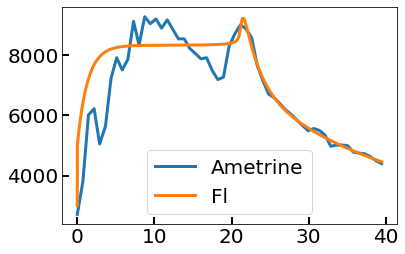

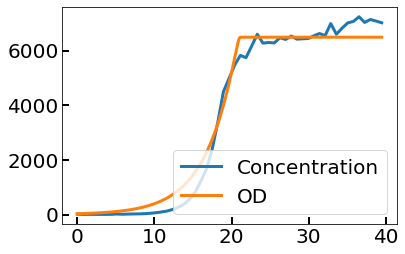

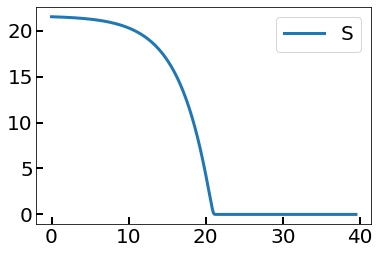

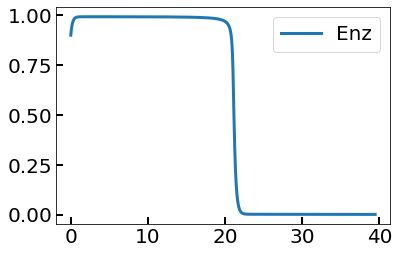

In [6]:
# varies = np.array([2.22881305e+01, 1.27700269e+01, 2.70000134e+03, 2.33904730e-08,
#        2.70033120e+03, 5.72123422e-03, 1.20171112e+00, 1.00000000e+01,
#        3.00139507e+02, 1.01563705e+02, 8.07584133e-04, 8.78936552e-03,
#        7.87874803e-02, 1.74413402e-02])

varies = res.x

tspan = np.array([df['Time'].to_numpy()[0], df['Time'].to_numpy()[-1]]) * 60
x0 = varies[:5]
p = varies[5:]
p[6] = p[6] / (p[6] / (p[7] + p[0]))
sol = solve_ivp(growth_fluorophore_enz, t_span=tspan, y0=x0, args=(p,), method='BDF', rtol=1e-9, atol=1e-12,)

plt.figure()
plt.plot(df['Time'], df['Ametrine'], label='Ametrine', linewidth=3)
plt.plot(sol.t/60, sol.y[4,:], label='Fl', linewidth=3)
# plt.plot(sol.t/60, sol.y[2,:], label='Fl_imm', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure()
plt.plot(df['Time'], df['Concentration'], label='Concentration', linewidth=3)
plt.plot(sol.t/60, sol.y[1,:], label='OD', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure()
plt.plot(sol.t/60, sol.y[0,:], label='S', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure()
plt.plot(sol.t/60, sol.y[3,:], label='Enz', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

In [9]:
import pandas as pd
from scipy.optimize import minimize

df = pd.read_csv('mAmetrineDataPlay.csv')

def growth_fluorophore_enz(t,x,p):

    # Parameters
    mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d = p

    # Variables
    S, X, Fl, Enz = x
    
    n = 1
    
    if S > 0:
        mu = mu_max * S * Enz / (Ks + S)
    else:
        mu = 0

    dEnzdt = ke_p * S / (Ks + S) - (ke_d + mu) * Enz
    dSdt = - (mu / Y) * X
    dXdt = mu * X
    
    if S > 0:
        dFdt = k_p * S ** n / (Kf ** n + S ** n) - (kd_p + mu) * Fl
    else:
        dFdt = - (kd_p + mu) * Fl


    return [dSdt, dXdt, dFdt, dEnzdt, ]

def fsolvemefunc(pars, plotme=False):
    global iter
    x0 = pars[:4]
    p = pars[4:]
    p[6] = p[6] / (p[6] / (p[7] + p[0]))
    tspan = np.array([df['Time'].to_numpy()[0], df['Time'].to_numpy()[-1]]) * 60
    sol = solve_ivp(growth_fluorophore_enz, t_span=tspan, y0=x0, args=(p,), t_eval=df['Time'] * 60, method='BDF', rtol=1e-6, atol=1e-9)

    pre10indices = df['Time'].to_numpy() < 6
    post10indices = df['Time'].to_numpy() >= 6


    mAm_error = np.sqrt(np.average((sol.y[2,:][pre10indices] - df['Ametrine'][pre10indices]) ** 2)) + np.sqrt(np.average((sol.y[2,:][post10indices] - df['Ametrine'][post10indices]) ** 2)) * 10
    OD_error = np.sqrt(np.average((sol.y[1,:][pre10indices] - df['Concentration'][pre10indices]) ** 2)) + np.sqrt(np.average((sol.y[1,:][post10indices] - df['Concentration'][post10indices]) ** 2)) * 10
    total_error = mAm_error + OD_error
    if iter %100 == 0:
        print("Running iteration " + str(iter) + "; current error: " + str(total_error) + "; pars: " + str(pars))
    iter += 1
    return total_error

mu_max = 2/200
Ks = 3
Kf = 0.1
Y = 0.5 * 600
k_p = 1.4514 * 70
kd_p = 0.007 / 1

ke_p = 1.4514 / 1
ke_d = 0.007 / 2
km_p = 0.007 / 1

# S, X, Fl, Enz
x_guess = [20, 0.1,2700, 0]
p_guess = [mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d]

iter = 0
fsolve_init = np.concatenate((x_guess, p_guess))
# fsolve_init = res.x
bounds=[(1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None), (1e-9, None)]
# bounds = [(1e-9, 40), (1e-9, 100), (2000, 3000), (1e-9, 0.9), (1e-9, 10), (1e-9, 10), (1e-9, 10), (1e-9, 1000), (1e-9, 500), (1e-9, 10), (1e-9, 500), (1e-9, 10)]
res = minimize(fsolvemefunc, fsolve_init, method='L-BFGS-B', bounds=bounds,
            options={'disp': None, 'maxls': 20, 'iprint': -1, 'gtol': 1e-09, 'eps': 1e-08, 'maxiter': 15000, 'ftol': 1e-12, 'maxcor': 10, 'maxfun': 15000})
print(res)

from scipy.optimize import differential_evolution
# bounds = [(1, 40), (0, 100), (2000, 5000), (0, 1), (0, 1), (0, 10), (0, 10), (0, 1000), (0, 500), (0, 10), (0, 500), (0, 10)]
# result = differential_evolution(fsolvemefunc, bounds=bounds, updating='deferred', workers=64, maxiter=100, popsize=100, tol=1e-6, disp=True)
# result = differential_evolution(fsolvemefunc, bounds=bounds, popsize=100, tol=1e-9, disp=True)

# print(result.x, result.fun)

Running iteration 0; current error: 46689.71213285411; pars: [2.00000e+01 1.00000e-01 2.70000e+03 1.00000e-09 1.00000e-02 3.00000e+00
 1.00000e-01 3.00000e+02 1.01598e+02 7.00000e-03 1.35000e-02 3.50000e-03]


KeyboardInterrupt: 

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

df = pd.read_csv('mAmetrineDataPlay.csv')

varies = np.array([2.23121174e+01, 1.96302455e+00, 2.70895508e+03, 5.05856640e-01,
       9.23336285e-03, 3.44112387e+00, 1.17782787e+01, 3.00191118e+02,
       1.01297101e+02, 8.56287891e-04, 1.45136976e+00, 2.59528149e+01])


# mu_max = 2/200
# Ks = 5
# Kf = 1
# Y = 0.5 * 600
# k_p = 1.4514 * 70
# kd_p = 0.007 / 5

# ke_p = 1.4514 / 1
# ke_d = 0.007 / 4
# km_p = 0.007 / 1

# # S, X, Fl, Enz
# x_guess = [20, 0.1,2700, 0]
# p_guess = [mu_max, Ks, Kf, Y, k_p, kd_p, ke_p, ke_d]

# varies = np.concatenate((x_guess, p_guess))

varies = np.array([2.21284001e+01, 6.52776548e+00, 2.69998839e+03, 4.91808870e-04,
 7.73964828e-03, 3.46608963e+00, 1.10667715e+00, 3.04075712e+02,
 1.14142851e+02, 1.48356527e-02, 2.06685646e-01, 1.98945998e-01,
 6.19706479e+01])


tspan = np.array([df['Time'].to_numpy()[0], df['Time'].to_numpy()[-1]]) * 60
x0 = varies[:4]
p = varies[4:]
p[6] = p[6] / (p[6] / (p[7] + p[0]))
sol = solve_ivp(growth_fluorophore_enz, t_span=tspan, y0=x0, args=(p,), t_eval=df['Time'] * 60, method='BDF', rtol=1e-6, atol=1e-9)

plt.figure()
plt.plot(df['Time'], df['Ametrine'], label='Ametrine', linewidth=3)
plt.plot(sol.t/60, sol.y[2,:], label='Fl', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure()
plt.plot(df['Time'], df['Concentration'], label='Concentration', linewidth=3)
plt.plot(sol.t/60, sol.y[1,:], label='OD', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure()
plt.plot(sol.t/60, sol.y[0,:], label='S', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

plt.figure()
plt.plot(sol.t/60, sol.y[3,:], label='Enz', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=7, direction='in')
plt.legend(fontsize=20)

ValueError: too many values to unpack (expected 8)